In [ ]:
%%capture
!git clone https://github.com/alphaameer007/RHM_FYP

In [ ]:
!pip install keras-tcn --no-dependencies 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tcn import TCN
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
#df=pd.read_csv('/content/RHM_FYP/TurkeyWindFarm.csv')
#df=pd.read_csv('book lstm rnn.csv')
refined = pd.read_csv('refined_eemd_data.csv')
refined_test = pd.read_csv('refined_eemd_test_data.csv')
train = pd.read_csv('train_8020.csv')
test = pd.read_csv('test_8020.csv')
print(refined)
print(refined_test)
print(train)
print(test)

          speed  power curve     angle     power
0      0.206540     0.124294  0.734583  0.109252
1      0.222424     0.123003  0.747290  0.108257
2      0.207599     0.125296  0.751999  0.106380
3      0.217767     0.130994  0.758163  0.109368
4      0.221157     0.143468  0.740361  0.108339
...         ...          ...       ...       ...
42043  0.063216     0.015313  0.226506  0.011986
42044  0.062339     0.002171  0.242306  0.017193
42045  0.060473     0.011558  0.312457  0.019094
42046  0.061001     0.011146  0.386255  0.016501
42047  0.066055     0.005788  0.399528  0.017633

[42048 rows x 4 columns]
          speed  power curve     angle     power
0      0.072603     0.002016  0.555998  0.016575
1      0.068335     0.004308  0.578958  0.013022
2      0.060905     0.007553  0.615745  0.022697
3      0.059264     0.013040  0.678765  0.026320
4      0.058021     0.014275  0.716684  0.012425
...         ...          ...       ...       ...
10507  0.421007     0.782620  0.224757  0.7

In [ ]:
train.drop('time', inplace=True, axis=1)
test.drop('time', inplace=True, axis=1)

In [ ]:
print(refined.info())
print(refined_test.info())
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42048 entries, 0 to 42047
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speed        42048 non-null  float64
 1   power curve  42048 non-null  float64
 2   angle        42048 non-null  float64
 3   power        42048 non-null  float64
dtypes: float64(4)
memory usage: 1.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speed        10512 non-null  float64
 1   power curve  10512 non-null  float64
 2   angle        10512 non-null  float64
 3   power        10512 non-null  float64
dtypes: float64(4)
memory usage: 328.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42048 entries, 0 to 42047
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               ----

In [ ]:

train_min = train.min(axis=0)
train_max = train.max(axis=0)
print(train_max)
print(train_min)

Wind Speed (m/s)         25.206011
wind energy            3600.000000
Wind Direction (°)      359.987396
LV ActivePower (kW)    3618.732910
dtype: float64
Wind Speed (m/s)        0.065332
wind energy            10.903226
Wind Direction (°)      0.015678
LV ActivePower (kW)    -2.471405
dtype: float64


In [ ]:

train_min = train.min(axis=0)
train_max = train.max(axis=0)


train = (train - train_min) / ( train_max - train_min)
test = (test - train_min) / ( train_max - train_min)

print(train.head(10))
print(test.head(10))



   Wind Speed (m/s)  wind energy  Wind Direction (°)  LV ActivePower (kW)
0          0.208666     0.112960            0.722221             0.105633
1          0.223018     0.141822            0.746240             0.125991
2          0.204875     0.105875            0.757140             0.085289
3          0.222522     0.140766            0.753510             0.116568
4          0.219270     0.133961            0.737999             0.105800
5          0.220309     0.136116            0.734955             0.111804
6          0.227825     0.152258            0.739358             0.124289
7          0.208456     0.112562            0.716539             0.107620
8          0.219537     0.134511            0.704125             0.128720
9          0.217094     0.129504            0.718690             0.122113
   Wind Speed (m/s)  wind energy  Wind Direction (°)  LV ActivePower (kW)
0          0.084449     0.007450            0.535162             0.017597
1          0.066099     0.007334      

In [ ]:
# Calculate the number of readings per day
readings_per_day = 144

#n = number of day
n = 3

# Calculate the sequence length (n days in readings)
sequence_length = readings_per_day * n

# Set the lookback window to be the same as the sequence length
lookback_window = sequence_length

# Convert the data to a NumPy array
refined = train.values
refined_test = test.values


x_train, y_train = [], []
for i in range(lookback_window, len(refined)):
    x_train.append(refined[i - lookback_window:i, :])
    y_train.append(refined[i, -1])
x_train = np.array(x_train)
y_train = np.array(y_train)




x_test, y_test = [], []
for i in range(lookback_window, len(refined_test)):
    x_test.append(refined_test[i - lookback_window:i, :])
    y_test.append(refined_test[i, -1])
x_test = np.array(x_test)
y_test = np.array(y_test)



print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

x_train : (41616, 432, 4)
x_test : (10080, 432, 4)
y_train : (41616,)
y_test : (10080,)


In [ ]:
model = keras.models.Sequential([
    TCN(input_shape=(lookback_window, 4), 
        kernel_size=10,
        nb_filters=32,
        dilations=[1, 2, 4, 8, 16],
        padding='causal',
        activation='relu',
        return_sequences=False,
        nb_stacks=2,
        use_skip_connections=False,
        use_batch_norm=False
        ),
    keras.layers.Dense(1)
])
model.summary()
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_mean_absolute_percentage_error",
    patience=8,
    start_from_epoch=1,
    restore_best_weights=True,
    mode="min"
)
model.compile('adam','mae',metrics=keras.metrics.MeanAbsolutePercentageError())
print('Train...')
history = model.fit(x_train, y_train,
                    epochs=50,
                    verbose=1,validation_data=(x_test,y_test)
                    #,callbacks=[early_stopping]
                    )

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_3 (TCN)                 (None, 32)                196640    
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 196,673
Trainable params: 196,673
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/50
1301/1301 [==============================] - 40s 22ms/step - loss: 0.3418 - mean_absolute_percentage_error: 3725.4417 - val_loss: 0.0762 - val_mean_absolute_percentage_error: 398.6171
Epoch 2/50
1301/1301 [==============================] - 23s 17ms/step - loss: 0.0626 - mean_absolute_percentage_error: 635.8903 - val_loss: 0.0571 - val_mean_absolute_percentage_error: 199.4944
Epoch 3/50
1301/1301 [========================

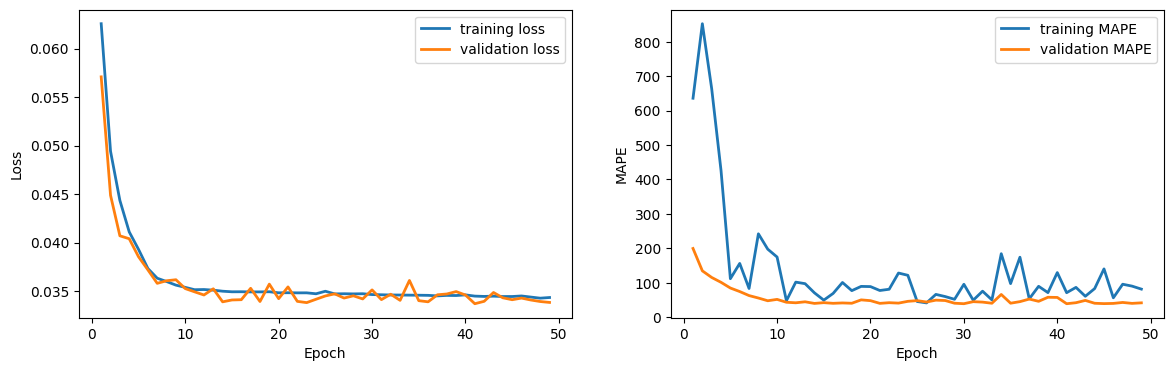

In [ ]:
import matplotlib.pyplot as plt
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[1:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[1:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[1:,"mean_absolute_percentage_error"], lw=2, label='training MAPE')
plt.plot(logs.loc[1:,"val_mean_absolute_percentage_error"], lw=2, label='validation MAPE')
plt.xlabel("Epoch")
plt.ylabel("MAPE")
plt.legend(loc='upper right')
plt.show()

In [ ]:
p = model.predict(x_test)

315/315 [==============================] - 2s 5ms/step


In [ ]:
print(x_test.shape)
print(y_test.shape)
print(p.shape)

(10080, 432, 4)
(10080,)
(10080, 1)


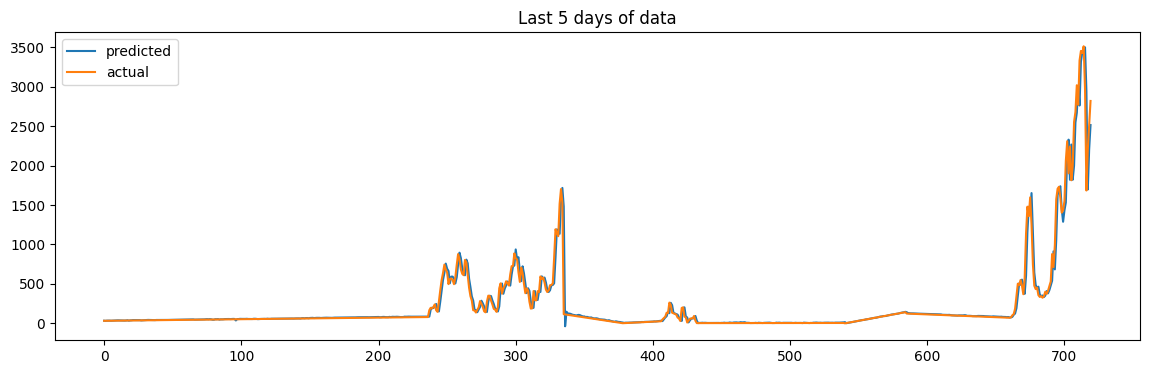

In [ ]:

plt.figure(figsize=(14, 4))
predictions = p

predicted_data = ( (predictions * (train_max[3]-train_min[3])) + train_min[3] )
y_test_data =  ( (y_test * (train_max[3]- train_min[3])) + train_min[3] )

plt.plot(predicted_data[-720:]) 
plt.plot(y_test_data[-720:]) 
plt.title('Last 5 days of data')
plt.legend(['predicted', 'actual'])
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae


predicted = pd.DataFrame(predicted_data[-720:])
actual_data = pd.DataFrame(y_test_data[-720:])
result = pd.concat([actual_data,predicted],axis=1)
result.columns = ['actual_data','predicted_data']

error_mape = mape(result['actual_data'],result['predicted_data'])
error_mae = mae(result['actual_data'],result['predicted_data'])

  

print("Mean absolute percentage error : " + str(error_mape))
print("Mean absolute  error : " + str(error_mae))

Mean absolute percentage error : 0.406601350006597
Mean absolute  error : 35.9066983698582


In [ ]:
APE = []
  
# Iterate over the list values
for day in range(720):
  
    # Calculate percentage error
    per_err = (result['actual_data'][day] - result['predicted_data'][day]) / 1500
  
    # Take absolute value of
    # the percentage error (APE)
    per_err = abs(per_err)
  
    # Append it to the APE list
    APE.append(per_err)
  
# Calculate the MAPE
MAPE = sum(APE)/len(APE)
  
# Print the MAPE value and percentage
print(f'''
MAPE   : { round(MAPE, 2) }
MAPE % : { round(MAPE*100, 2) } %
''')


MAPE   : 0.02
MAPE % : 2.39 %



In [ ]:
accuracy = np.corrcoef(result['actual_data'],result['predicted_data'])
accuracy

array([[1.        , 0.97338947],
       [0.97338947, 1.        ]])